# Как использовать deepchecks для поиска отравленных данных?

**Deepchecks** — это библиотека для проверки качества данных и моделей машинного обучения. Она предоставляет инструменты для выявления проблем в данных, таких как дубликаты, аномалии, несбалансированность классов и многое другое.

**Шаги для тестирования:**
* Загрузка данных :  Загружаем исходный набор данных и набор данных с атаками.

* Настройка проверок :  Используем готовые проверки из deepchecks, чтобы найти аномалии и несоответствия в данных.

Например:

**TrainTestFeatureDrift**: Проверка на дрейф признаков между обучающим и тестовым наборами.

**ConflictingLabels**: Поиск конфликтующих меток (полезно для Label Flipping Attack).

**OutlierSampleDetection**: Поиск выбросов в данных (полезно для Feature Manipulation Attack).


Для тестирования deepchecks можно использовать следующие примеры атак:

* Label Flipping Attack: Изменение меток целевого признака.
* Feature Manipulation Attack: Добавление шума или аномальных значений в признаки.
* Backdoor Attack: Внедрение скрытых триггеров.
* Data Injection Attack: Добавление новых записей в данные.

In [ ]:
import pandas as pd

# Загрузка исходного датасета Titanic
data = pd.read_csv('titanic.csv')


**1. Label Flipping Attack** (Изменение меток целевого признака)

Изменили метки выживших (Survived) для 20% записей.

In [ ]:
import numpy as np
# Label Flipping Attack: Изменение меток Survived для 20% записей
np.random.seed(42)
mask = np.random.rand(len(data)) < 0.2  # 20% данных
label_flipping_data = data.copy()
label_flipping_data.loc[mask, 'Survived'] = 1 - label_flipping_data.loc[mask, 'Survived']
label_flipping_data.to_csv('titanic_label_flipping.csv', index=False)

**2. Feature Manipulation Attack** (Добавление шума или аномальных значений в признаки)

Мы добавили шум к признакам Age и Fare.

In [ ]:
# Feature Manipulation Attack: Добавление шума к Age и Fare
feature_manipulation_data = data.copy()
feature_manipulation_data['Age'] += np.random.normal(0, 10, size=len(feature_manipulation_data))  # Больший шум
feature_manipulation_data['Fare'] += np.random.normal(0, 100, size=len(feature_manipulation_data))  # Больший шум
feature_manipulation_data.to_csv('titanic_feature_manipulation.csv', index=False)

**3. Backdoor Attack** (Внедрение скрытых триггеров)

Мы создали новый признак BackdoorTrigger, который будет активирован для 30% записей.

In [ ]:
# Backdoor Attack: Внедрение скрытых триггеров
backdoor_data = data.copy()
backdoor_data['BackdoorTrigger'] = 0
mask = np.random.rand(len(backdoor_data)) < 0.3  # 30% данных
backdoor_data.loc[mask, 'BackdoorTrigger'] = 1
backdoor_data.to_csv('titanic_backdoor.csv', index=False)

**4. Data Injection Attack** (Добавление новых записей в данные)

Добавили 100 новых нереалистичных записей в датасет, которые были искусственно созданы.

In [ ]:
# Data Injection Attack: Добавление новых записей
new_records = pd.DataFrame({
    'PassengerId': range(1000, 1100),
    'Survived': [1] * 100,  # Все новые записи "выжили"
    'Pclass': [1] * 100,   # Первый класс
    'Name': ['Injected Passenger {}'.format(i) for i in range(100)],
    'Sex': ['male'] * 50 + ['female'] * 50,
    'Age': [-1] * 100,     # Нереалистичный возраст
    'SibSp': [0] * 100,
    'Parch': [0] * 100,
    'Ticket': ['Injected{}'.format(i) for i in range(100)],
    'Fare': [1000] * 100,  # Нереалистичный тариф
    'Cabin': ['C{}'.format(i) for i in range(100)],
    'Embarked': ['S'] * 100
})

data_injection_data = pd.concat([data, new_records], ignore_index=True)
data_injection_data.to_csv('titanic_data_injection.csv', index=False)

Установка Deepchecks:

In [ ]:
!pip install deepchecks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.16.0
    Uninstalling jupyter-server-1.16.0:
      Successfully uninstalled jupyter-server-1.16.0


In [ ]:
!pip install tensorflow deepchecks matplotlib

In [ ]:
# Шаг 1: Установка необходимых библиотек
!pip install torch torchvision deepchecks matplotlib pytorch-ignite

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.2/343.2 kB 26.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
# Установка Deepchecks
!pip install deepchecks -U --quiet

Проверка датасетов с помощью Deepchecks:

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd

# Отключение автоматического преобразования типов
pd.set_option('future.no_silent_downcasting', True)

from deepchecks.tabular import Dataset
np.Inf = np.inf
from deepchecks.tabular.suites import full_suite
from sklearn.model_selection import train_test_split

# Загрузка данных
datasets = {
    "Original": pd.read_csv('titanic.csv'),
    "Label Flipping": pd.read_csv('titanic_label_flipping.csv'),
    "Feature Manipulation": pd.read_csv('titanic_feature_manipulation.csv'),
    "Backdoor": pd.read_csv('titanic_backdoor.csv'),
    "Data Injection": pd.read_csv('titanic_data_injection.csv')
}

# Разделение данных на train и test
train_datasets = {}
test_datasets = {}

for name, df in datasets.items():
    # Разделение на train (80%) и test (20%)
    train, test = train_test_split(df, test_size=0.2, random_state=42)

    # Создание объектов Dataset
    train_datasets[name] = Dataset(train, label='Survived', cat_features=['Sex', 'Embarked'])
    test_datasets[name] = Dataset(test, label='Survived', cat_features=['Sex', 'Embarked'])

# Запуск полного набора проверок
suite = full_suite()

results = {}
for name in train_datasets.keys():
    print(f"\nRunning checks for {name} dataset...")
    try:
        # Выполнение проверок
        results[name] = suite.run(train_dataset=train_datasets[name], test_dataset=test_datasets[name])

        # Сохранение результатов в HTML-файл
        output_file = f"results_{name}.html"
        results[name].save_as_html(output_file)
        print(f"Results saved to {output_file}")
    except Exception as e:
        print(f"Error in {name} dataset: {e}")


Running checks for Original dataset...


Results saved to results_Original.html

Running checks for Label Flipping dataset...


Results saved to results_Label Flipping.html

Running checks for Feature Manipulation dataset...


Results saved to results_Feature Manipulation.html

Running checks for Backdoor dataset...


Results saved to results_Backdoor.html

Running checks for Data Injection dataset...


Results saved to results_Data Injection.html


# Извлечение основных метрик:

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup

# Создаем пустой список для хранения метрик
metrics = []

# Список HTML-файлов
html_files = {
    "Original": "results_Original.html",
    "Label Flipping": "results_Label Flipping.html",
    "Feature Manipulation": "results_Feature Manipulation.html",
    "Backdoor": "results_Backdoor.html",
    "Data Injection": "results_Data Injection.html"
}

# Парсинг каждого HTML-файла
for name, file in html_files.items():
    with open(file, "r", encoding="utf-8") as f:
        soup = BeautifulSoup(f, "html.parser")

    # Инициализация словаря для текущего датасета
    dataset_metrics = {"Dataset": name}

    # Извлечение метрик
    for check_name in ["Outlier Sample Detection", "Conflicting Labels", "Train Test Feature Drift"]:
        # Поиск заголовка проверки
        check_section = soup.find("h3", text=check_name)
        if check_section:
            # Поиск значений в соседних элементах
            value_element = check_section.find_next("p")
            if value_element:
                value_text = value_element.get_text()
                # Извлечение числового значения
                try:
                    value = float(value_text.split(":")[-1].strip().replace("%", ""))
                except ValueError:
                    value = None  # Если значение не удалось извлечь
            else:
                value = None
        else:
            value = None

        # Сохранение метрики
        dataset_metrics[check_name] = value

    # Добавление метрик текущего датасета в общий список
    metrics.append(dataset_metrics)

# Создаем DataFrame для метрик
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

<ipython-input-15-cf8670eefa40>:27: DeprecationWarning:

The 'text' argument to find()-type methods is deprecated. Use 'string' instead.



                Dataset Outlier Sample Detection Conflicting Labels  \
0              Original                     None               None   
1        Label Flipping                     None               None   
2  Feature Manipulation                     None               None   
3              Backdoor                     None               None   
4        Data Injection                     None               None   

  Train Test Feature Drift  
0                     None  
1                     None  
2                     None  
3                     None  
4                     None  


Видимо плохая атака, так не получается

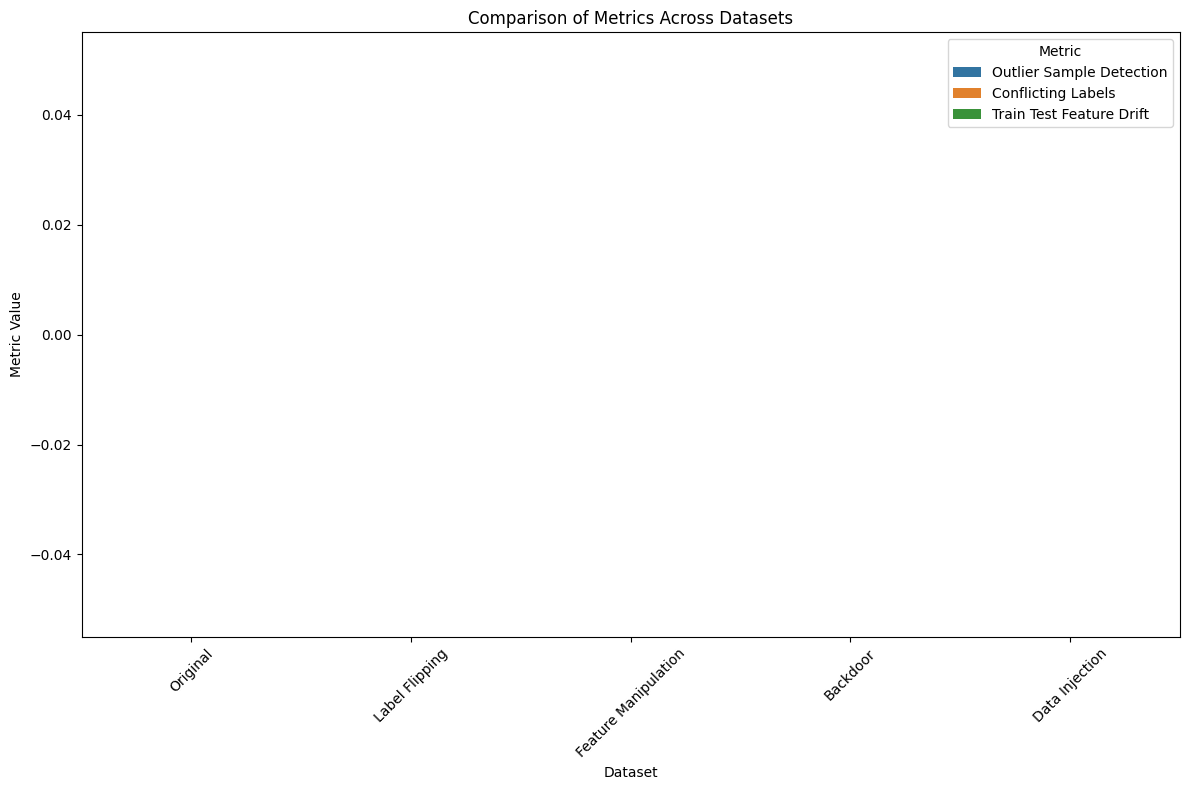

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка графика
plt.figure(figsize=(12, 8))

# Визуализация метрик
sns.barplot(data=metrics_df.melt(id_vars="Dataset"), x="Dataset", y="value", hue="variable")
plt.title("Comparison of Metrics Across Datasets")
plt.ylabel("Metric Value")
plt.xlabel("Dataset")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.tight_layout()

# Показать график
plt.show()

:(

In [ ]:
!pip install tensorflow deepchecks matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.16.0
    Uninstalling jupyter-server-1.16.0:
      Successfully uninstalled jupyter-server-1.16.0


In [ ]:
# Шаг 1: Установка необходимых библиотек
!pip install torch torchvision deepchecks matplotlib pytorch-ignite



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.2/343.2 kB 22.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
# Установка Deepchecks
!pip install deepchecks -U --quiet

**1. Бэкдор атака (Backdoor Attack)**

Это тип атаки на модели машинного обучения, при котором злоумышленник намеренно внедряет скрытый триггер (паттерн) в обучающие данные. Этот триггер заставляет модель выдавать неправильные прогнозы для определённых входных данных, содержащих этот триггер, но при этом модель продолжает работать корректно для всех остальных данных.

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
# Монки-патч для исправления ошибки
np.Inf = np.inf

from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import full_suite, data_integrity

# Загрузка данных
from deepchecks.tabular.datasets.classification import iris

# Шаг 1: Загрузка чистого датасета Iris
iris_df = iris.load_data(data_format='Dataframe', as_train_test=False)
label_col = 'target'
df_train, df_test = train_test_split(iris_df, stratify=iris_df[label_col], random_state=0)

# Обучение модели на чистых данных
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(df_train.drop(label_col, axis=1), df_train[label_col])

# Создание объектов Dataset для чистых данных
ds_train_clean = Dataset(df_train, label=label_col, cat_features=[])
ds_test_clean = Dataset(df_test, label=label_col, cat_features=[])

# Шаг 2: Проверка чистых данных с помощью Deepchecks
print("=== Проверка чистых данных ===")
integ_suite = data_integrity()
integ_suite.run(ds_train_clean)

# Шаг 3: Заражение данных бэкдором
def inject_backdoor(data, label_col, backdoor_feature_index=0, backdoor_value=100, target_label=2):
    """
    Функция для заражения данных бэкдором.
    :param data: DataFrame с данными.
    :param label_col: Имя столбца с метками.
    :param backdoor_feature_index: Индекс признака, который будет изменён.
    :param backdoor_value: Значение, которое будет добавлено как бэкдор.
    :param target_label: Целевая метка для бэкдора.
    :return: DataFrame с заражёнными данными.
    """
    # Перенумеруем индексы DataFrame
    data = data.reset_index(drop=True)

    # Выбираем случайные строки для заражения (10% данных)
    infected_indices = np.random.choice(data.index, size=int(len(data) * 0.1), replace=False)

    # Добавляем бэкдор: меняем значение одного признака и метку
    data_with_backdoor = data.copy()
    for idx in infected_indices:
        data_with_backdoor.loc[idx, data.columns[backdoor_feature_index]] = backdoor_value
        data_with_backdoor.at[idx, label_col] = target_label

    return data_with_backdoor

# Заражаем обучающую выборку
df_train_infected = inject_backdoor(df_train, label_col=label_col)

# Создание объектов Dataset для заражённых данных
ds_train_infected = Dataset(df_train_infected, label=label_col, cat_features=[])

#  Проверка заражённых данных с помощью Deepchecks
print("\n=== Проверка заражённых данных ===")
integ_suite.run(ds_train_infected)

#  Обучение модели на заражённых данных и проверка её производительности
rf_clf_infected = RandomForestClassifier(random_state=0)
rf_clf_infected.fit(df_train_infected.drop(label_col, axis=1), df_train_infected[label_col])

# Создание тестового набора с бэкдором
df_test_infected = inject_backdoor(df_test, label_col=label_col)
ds_test_infected = Dataset(df_test_infected, label=label_col, cat_features=[])

# Проверка полного набора на заражённых данных
print("\n=== Полный набор проверок на заражённых данных ===")
suite = full_suite()
suite.run(train_dataset=ds_train_infected, test_dataset=ds_test_infected, model=rf_clf_infected)

=== Проверка чистых данных ===



=== Проверка заражённых данных ===



=== Полный набор проверок на заражённых данных ===


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/deepchecks/utils/abstracts/weak_segment_abstract.py", line 336, in neg_worst_segment_score
    return -get_worst_leaf_filter(clf.tree_)[0]
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/deepchecks/utils/abstracts/weak_segment_abstract.py", line 321, in get_worst_leaf_filter
    leaves_filters = convert_tree_leaves_into_filters(tree, features_for_segment)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Full Suite

Основные выводы:

**Высокие значения PPS (petal length (cm) и petal width (cm)):**

Эти признаки имеют очень высокие значения PPS, что может быть признаком утечки данных или избыточной зависимости модели от этих признаков.

Необходимо проверить, нет ли утечки данных или избыточной корреляции между этими признаками и меткой.

**Низкие значения PPS (sepal width (cm)):**

Этот признак имеет низкое значение PPS, что указывает на его малую значимость для предсказания метки.

Возможно, стоит рассмотреть удаление этого признака, если он не добавляет ценную информацию.

**Различия между Train и Test:**

Небольшие различия в PPS между обучающей и тестовой выборками могут указывать на дрейф данных.

Необходимо убедиться, что данные остаются стабильными во времени и между выборками.

**2. Атака "Label Flipping"**

Описание:

В этой атаке злоумышленник меняет метки в обучающих данных, чтобы снизить производительность модели или заставить её делать неправильные прогнозы.
Например, если в задаче классификации есть три класса (0, 1, 2), злоумышленник может заменить все метки 0 на 2.

In [ ]:
# Импорт библиотек
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import full_suite, data_integrity

# Загрузка данных
from deepchecks.tabular.datasets.classification import iris

# Шаг 1: Загрузка чистого датасета Iris
iris_df = iris.load_data(data_format='Dataframe', as_train_test=False)
label_col = 'target'
df_train, df_test = train_test_split(iris_df, stratify=iris_df[label_col], random_state=0)

# Функция для атаки Label Flipping
def label_flipping_attack(data, label_col, target_label=0, flipped_label=2):
    """
    Функция для имитации атаки Label Flipping.
    :param data: DataFrame с данными.
    :param label_col: Имя столбца с метками.
    :param target_label: Метка, которую нужно изменить.
    :param flipped_label: Новое значение метки.
    :return: DataFrame с изменёнными метками.
    """
    data_with_flipped_labels = data.copy()
    data_with_flipped_labels.loc[data_with_flipped_labels[label_col] == target_label, label_col] = flipped_label
    return data_with_flipped_labels

# Заражаем обучающую выборку
df_train_flipped = label_flipping_attack(df_train, label_col=label_col)

# Создание объектов Dataset для заражённых данных
ds_train_flipped = Dataset(df_train_flipped, label=label_col, cat_features=[])

#  Проверка заражённых данных с помощью Deepchecks
print("\n=== Проверка данных после атаки Label Flipping ===")
integ_suite = data_integrity()
integ_suite.run(ds_train_flipped)

#  Обучение модели на заражённых данных и проверка её производительности
rf_clf_flipped = RandomForestClassifier(random_state=0)
rf_clf_flipped.fit(df_train_flipped.drop(label_col, axis=1), df_train_flipped[label_col])

# Создание тестового набора
ds_test = Dataset(df_test, label=label_col, cat_features=[])

# Проверка полного набора на заражённых данных
print("\n=== Полный набор проверок на заражённых данных ===")
suite = full_suite()
suite.run(train_dataset=ds_train_flipped, test_dataset=ds_test, model=rf_clf_flipped)


=== Проверка данных после атаки Label Flipping ===



=== Полный набор проверок на заражённых данных ===


/usr/local/lib/python3.11/dist-packages/deepchecks/tabular/checks/train_test_validation/train_test_samples_mix.py:85: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Full Suite

**3. Атака "Feature Manipulation"**

Описание:

В этой атаке злоумышленник преднамеренно изменяет значения одного или нескольких признаков в обучающих данных, чтобы снизить производительность модели или заставить её делать ошибочные прогнозы.
Например, можно добавить случайный шум к одному из признаков.

In [ ]:
# Функция для атаки Feature Manipulation
def feature_manipulation_attack(data, feature_index=0, noise_level=5):
    """
    Функция для имитации атаки Feature Manipulation.
    :param data: DataFrame с данными.
    :param feature_index: Индекс признака, который будет изменён.
    :param noise_level: Уровень шума, который добавляется к признаку.
    :return: DataFrame с изменёнными признаками.
    """
    data_with_noise = data.copy()
    # Добавляем случайный шум к выбранному признаку
    noise = np.random.normal(loc=0, scale=noise_level, size=len(data))
    data_with_noise.iloc[:, feature_index] += noise
    return data_with_noise

# Заражаем обучающую выборку
df_train_manipulated = feature_manipulation_attack(df_train, feature_index=0, noise_level=5)

# Создание объектов Dataset для заражённых данных
ds_train_manipulated = Dataset(df_train_manipulated, label=label_col, cat_features=[])

#Проверка заражённых данных с помощью Deepchecks
print("\n=== Проверка данных после атаки Feature Manipulation ===")
integ_suite = data_integrity()
integ_suite.run(ds_train_manipulated)

# Обучение модели на заражённых данных и проверка её производительности
rf_clf_manipulated = RandomForestClassifier(random_state=0)
rf_clf_manipulated.fit(df_train_manipulated.drop(label_col, axis=1), df_train_manipulated[label_col])

# Проверка полного набора на заражённых данных
print("\n=== Полный набор проверок на заражённых данных ===")
suite = full_suite()
suite.run(train_dataset=ds_train_manipulated, test_dataset=ds_test, model=rf_clf_manipulated)


=== Проверка данных после атаки Feature Manipulation ===



=== Полный набор проверок на заражённых данных ===


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/deepchecks/utils/abstracts/weak_segment_abstract.py", line 336, in neg_worst_segment_score
    return -get_worst_leaf_filter(clf.tree_)[0]
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/deepchecks/utils/abstracts/weak_segment_abstract.py", line 321, in get_worst_leaf_filter
    leaves_filters = convert_tree_leaves_into_filters(tree, features_for_segment)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Full Suite

**Data Injection**

Это тип атаки на машинное обучение, при котором злоумышленник добавляет вредоносные или специально созданные данные в обучающий набор.

Цель такой атаки — исказить процесс обучения модели, чтобы она делала ошибки при работе с реальными данными. Это может привести к снижению точности модели, неправильной классификации или даже выполнению целевых действий, выгодных злоумышленнику.

In [ ]:
# Монки-патч для исправления ошибки
np.Inf = np.inf
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import data_integrity, full_suite

# Функция для атаки Data Injection
def data_injection_attack(data, label_col, num_injected_samples=100, malicious_label=None):
    """
    Функция для имитации атаки Data Injection.
    :param data: DataFrame с данными.
    :param label_col: Название столбца с метками классов.
    :param num_injected_samples: Количество вредоносных объектов для добавления.
    :param malicious_label: Метка, которую нужно присвоить вредоносным объектам (если None, то случайная).
    :return: DataFrame с добавленными вредоносными объектами.
    """
    # Создаем копию данных для модификации
    injected_data = data.copy()

    # Генерация случайных данных для вредоносных объектов
    malicious_samples = {}
    for col in data.columns:
        if col == label_col:
            # Присваиваем метку для вредоносных объектов
            if malicious_label is not None:
                malicious_samples[col] = [malicious_label] * num_injected_samples
            else:
                # Если метка не указана, выбираем случайную метку из имеющихся
                malicious_samples[col] = np.random.choice(data[label_col].unique(), size=num_injected_samples)
        else:
            # Для остальных признаков генерируем случайные значения в пределах диапазона
            min_val = data[col].min()
            max_val = data[col].max()
            malicious_samples[col] = np.random.uniform(min_val, max_val, size=num_injected_samples)

    # Преобразуем словарь в DataFrame
    malicious_df = pd.DataFrame(malicious_samples)

    # Добавляем вредоносные объекты к исходным данным
    injected_data = pd.concat([injected_data, malicious_df], ignore_index=True)
    return injected_data

# Заражаем обучающую выборку
df_train_injected = data_injection_attack(df_train, label_col=label_col, num_injected_samples=100, malicious_label=1)

# Создание объектов Dataset для заражённых данных
ds_train_injected = Dataset(df_train_injected, label=label_col, cat_features=[])

#  Проверка заражённых данных с помощью Deepchecks
print("\n=== Проверка данных после атаки Data Injection ===")
integ_suite = data_integrity()
integ_suite.run(ds_train_injected)

#  Обучение модели на заражённых данных и проверка её производительности
rf_clf_injected = RandomForestClassifier(random_state=0)
rf_clf_injected.fit(df_train_injected.drop(label_col, axis=1), df_train_injected[label_col])

# Проверка полного набора на заражённых данных
print("\n=== Полный набор проверок на заражённых данных ===")
suite = full_suite()
suite.run(train_dataset=ds_train_injected, test_dataset=ds_test, model=rf_clf_injected)


=== Проверка данных после атаки Data Injection ===



=== Полный набор проверок на заражённых данных ===


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/deepchecks/utils/abstracts/weak_segment_abstract.py", line 336, in neg_worst_segment_score
    return -get_worst_leaf_filter(clf.tree_)[0]
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/deepchecks/utils/abstracts/weak_segment_abstract.py", line 321, in get_worst_leaf_filter
    leaves_filters = convert_tree_leaves_into_filters(tree, features_for_segment)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Full Suite

Проверка чистого датасета ИРИС

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import data_integrity, full_suite

# Шаг 1: Загрузка данных
from sklearn.datasets import load_iris

# Загружаем данные Iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="target")

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создаем DataFrame для обучающей и тестовой выборок
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

# Определяем название столбца меток
label_col = "target"

# Создание объектов Dataset для Deepchecks
ds_train = Dataset(df_train, label=label_col, cat_features=[])
ds_test = Dataset(df_test, label=label_col, cat_features=[])

# Проверка целостности данных с помощью Deepchecks
print("\n=== Проверка данных перед обучением модели ===")
integrity_suite = data_integrity()
integrity_suite.run(ds_train)

# Шаг 4: Обучение модели
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Шаг 5: Полная проверка модели с Deepchecks
print("\n=== Полный набор проверок для модели ===")
suite = full_suite()
suite.run(train_dataset=ds_train, test_dataset=ds_test, model=rf_clf)


=== Проверка данных перед обучением модели ===



=== Полный набор проверок для модели ===


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/deepchecks/utils/abstracts/weak_segment_abstract.py", line 336, in neg_worst_segment_score
    return -get_worst_leaf_filter(clf.tree_)[0]
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/deepchecks/utils/abstracts/weak_segment_abstract.py", line 321, in get_worst_leaf_filter
    leaves_filters = convert_tree_leaves_into_filters(tree, features_for_segment)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Full Suite